In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
TABLE_FILE = 'data_ch4.h5'
d2 = pd.read_hdf(TABLE_FILE)
d2 = d2.dropna()
rates = d2[['DFE','GDP_CD','Both']].values.astype('float')

/tmp/ipykernel_9017/2095488685.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


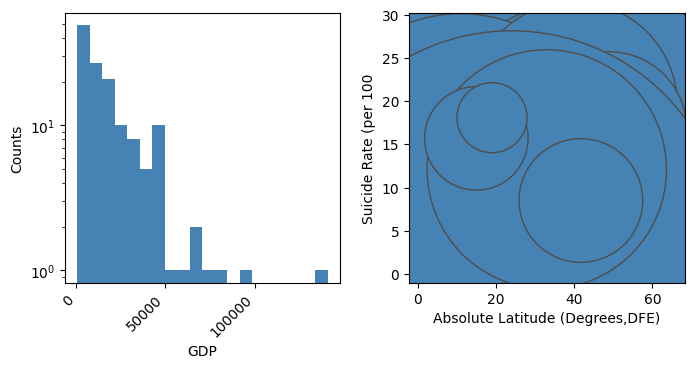

In [10]:
plt.subplots(12, figsize=(8,3.5))
plt.subplot(121)
plt.hist(rates.T[1], bins=20,color='SteelBlue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.xlabel('GDP')
plt.ylabel('Counts')
plt.subplot(122)
plt.scatter(rates.T[0], rates.T[2],
s=2e5*rates.T[1]/rates.T[1].max(),
color='SteelBlue', edgecolors='0.3');
plt.xlabel('Absolute Latitude (Degrees,DFE)')
plt.ylabel('Suicide Rate (per 100')
plt.subplots_adjust(wspace=0.25)

In [12]:
import scipy.cluster.hierarchy as hac
import scipy.cluster.vq as vq
w = vq.whiten(rates)


/tmp/ipykernel_9017/1202760990.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


(array([-1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4')])

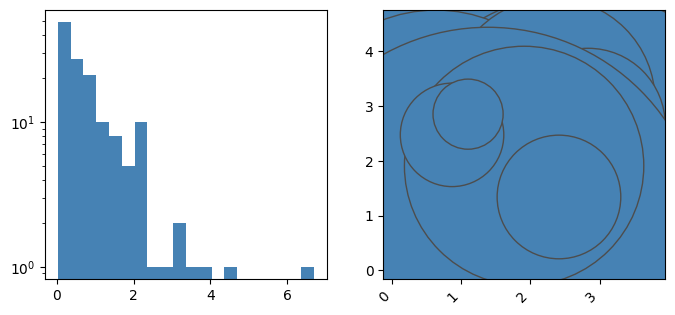

In [15]:
plt.subplots(12, figsize=(8,3.5))
plt.subplot(121)
plt.hist(w[:,1], bins=20, color='SteelBlue')
plt.yscale('log')
plt.subplot(122)
plt.scatter(w.T[0], w.T[2], s=2e5*w.T[1]/w.T[1].max(),
    color='SteelBlue', edgecolors='0.3')
plt.xticks(rotation=45, ha='right')

In [16]:
sc = rates.std(axis=0)

In [17]:
init_guess = np.array([[20,20E3,10],[45,100E3,15]])
init_guess /= sc
z2_cb, z2_lbl = vq.kmeans2(w, init_guess, minit='matrix', iter=500)

In [18]:
z2_cb_sc = z2_cb * sc

/tmp/ipykernel_9017/2625979904.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(z2_cb_sc[0,0], z2_cb_sc[0,2],s=5e2*z2_cb_sc[0,1]/rates.T[1].max(),marker='+', color='k',edgecolors='k', lw=2, zorder=10, alpha=0.7)
/tmp/ipykernel_9017/2625979904.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(z2_cb_sc[1,0], z2_cb_sc[1,2], s=5e2*z2_cb_sc[1,1]/rates.T[1].max(),


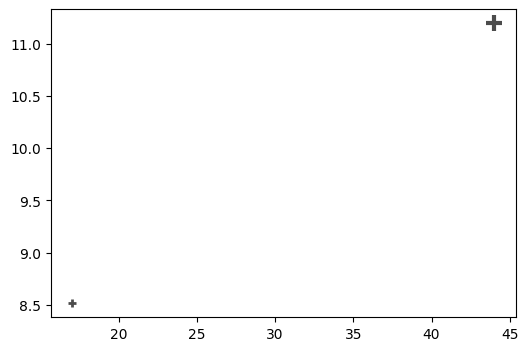

In [20]:
# K-means clustering figure START
plt.figure(figsize=(6,4))
plt.scatter(z2_cb_sc[0,0], z2_cb_sc[0,2],s=5e2*z2_cb_sc[0,1]/rates.T[1].max(),marker='+', color='k',edgecolors='k', lw=2, zorder=10, alpha=0.7)
plt.scatter(z2_cb_sc[1,0], z2_cb_sc[1,2], s=5e2*z2_cb_sc[1,1]/rates.T[1].max(),
marker='+', color='k', edgecolors='k', lw=3, zorder=10, alpha=0.7)

/tmp/ipykernel_9017/3351753431.py:1: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "Nen". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  p1 = plt.scatter([],[], hatch='None',
/tmp/ipykernel_9017/3351753431.py:4: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "Nen". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  p2 = plt.scatter([],[], hatch='None',
/tmp/ipykernel_9017/3351753431.py:7: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "Nen". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  p3 = plt.scatter([],[], hatch='None',
/tmp/ipykernel_9017/3351753431.py:10: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but f

TypeError: slice indices must be integers or None or have an __index__ method

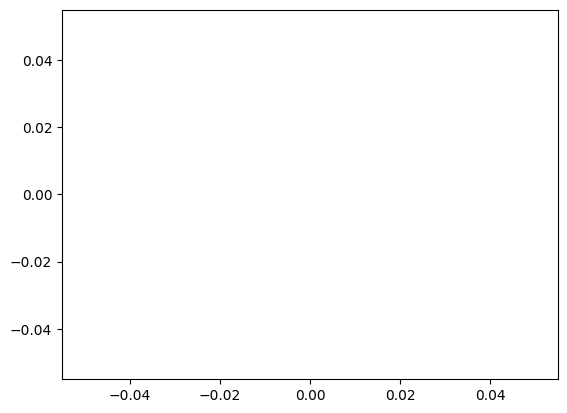

In [25]:
p1 = plt.scatter([],[], hatch='None',
s=20E3*5e2/rates.T[1].max(),
color='k', edgecolors='None',)
p2 = plt.scatter([],[], hatch='None',
s=40E3*5e2/rates.T[1].max(),
color='k', edgecolors='None',)
p3 = plt.scatter([],[], hatch='None',
s=60E3*5e2/rates.T[1].max(),
color='k', edgecolors='None',)
p4 = plt.scatter([],[], hatch='None',
s=80E3*5e2/rates.T[1].max(),
color='k', edgecolors='None',)
labels = ["20'", "40'", "60'", ">80'"]
plt.legend([p1, p2, p3, p4], labels, ncol=1, frameon=True, fontsize=12,handlelength=1, loc=1, borderpad=0.75,labelspacing=0.75, handletextpad=0.75, title='GDP', scatterpoints=1.5)
plt.ylim((-4,40))
plt.xlim((-4,80))
plt.title('K-means clustering')
plt.xlabel('Absolute Latitude (Degrees, DFE')
plt.ylabel('Suicide Rate (per 100 000)')